# K-Means Clustering

In [59]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets


In [60]:
# IRIS dataset from Kaggle
df=pd.read_csv("Iris.csv")

In [61]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [62]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
# IRIS dataset provided in the sklearn library
iris = datasets.load_iris()

In [64]:
# Test1, using sklearn library (first two columns: Sepal Length Cm, SepalWidth Cm)
X = iris.data[:, :2]
y = iris.target

Text(0, 0.5, 'Sepal Width (cm)')

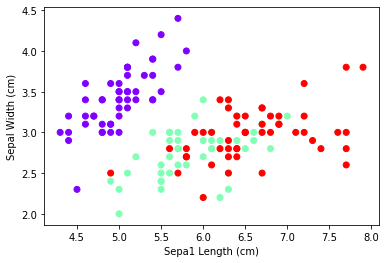

In [66]:
# Scatterplot with plt
plt.scatter(X[:,0],X[:,1],c=y,cmap="rainbow")
plt.xlabel('Sepa1 Length (cm)')
plt.ylabel('Sepal Width (cm)')


Text(0, 0.5, 'Sepal Width (cm)')

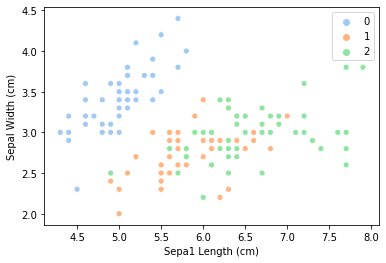

In [40]:
#Scatterplot with Seaborn
sns.scatterplot(X[:,0],X[:,1],hue=y,palette="pastel")
plt.xlabel('Sepa1 Length (cm)')
plt.ylabel('Sepal Width (cm)')

# Run KMEANS algorithm

In [41]:
# creating Kmeans object using  KMeans()
kmeans=KMeans(n_clusters=3,random_state=42)

In [42]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [47]:
# instantiate a variable for the centers
centers=kmeans.cluster_centers_
new_labels=kmeans.labels_


In [49]:
print(centers)

[[5.77358491 2.69245283]
 [6.81276596 3.07446809]
 [5.006      3.428     ]]


Text(0.5, 1.0, 'K-Means Clustering')

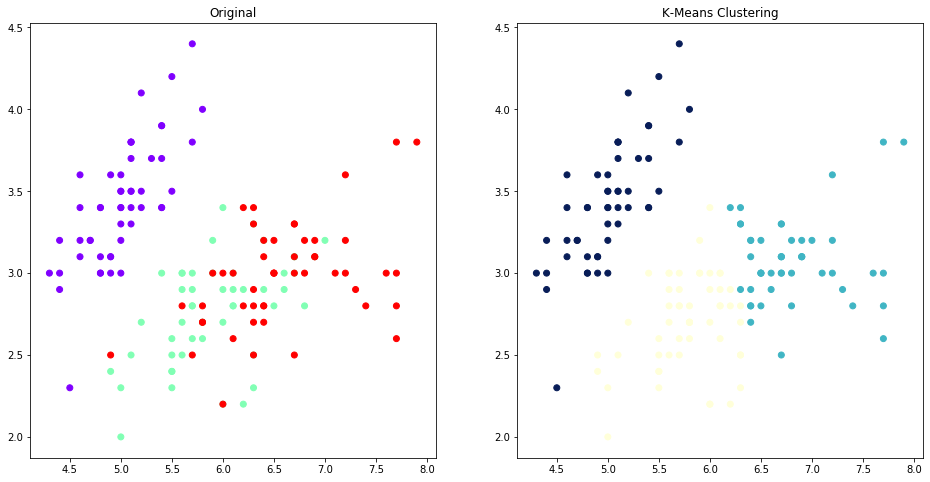

In [69]:
#Comparison of original data with clustered results plt

fig,axes =plt.subplots(1,2, figsize=(16,8))

axes[0].scatter(X[:,0],X[:,1],c=y,cmap="rainbow")
axes[1].scatter(X[:,0],X[:,1],c=new_labels,cmap="YlGnBu")
axes[0].set_title("Original")
axes[1].set_title("K-Means Clustering")

Text(0.5, 1.0, 'K-Means Clustering')

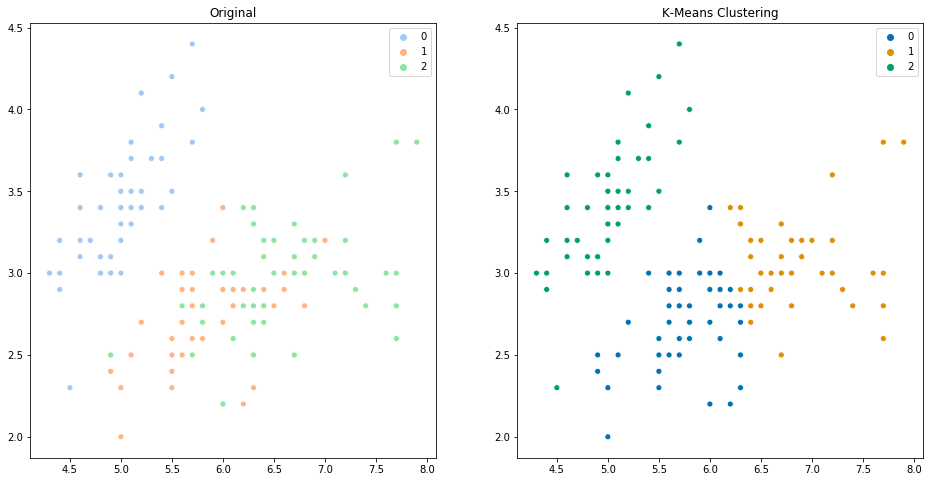

In [71]:
#Comparison of original data with clustered results SEABORN

fig,axes =plt.subplots(1,2, figsize=(16,8))

sns.scatterplot(X[:,0],X[:,1],ax=axes[0],hue=y,palette="pastel")
sns.scatterplot(X[:,0],X[:,1],ax=axes[1],hue=new_labels,palette="colorblind")
axes[0].set_title("Original")
axes[1].set_title("K-Means Clustering")

Conclusion: One cluster is quite accurate. The other two clusters (1,2) are not as easily distinguished.

Summary: I used the sklearn IRIS dataset to train and test a model, with the aim of distinguishing among three plant species. Then colorized scatter plot visualizations of the data, representing width and length characteristics for sample observations.

# Hierarchical Clustering

In [71]:
from scipy.cluster.hierarchy import linkage,fcluster

In [72]:
sub=df.iloc[:,1:3]
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
# Ward Linkage: The distance between clusters is the sum of squared differences within all clusters
z=linkage(sub, method='ward',metric="euclidean")

In [74]:
df['cluster_labels']=fcluster(z,3,criterion='maxclust')

In [79]:
label={1:"a",2:"b",3:"c"}
df['cluster_labels']=df['cluster_labels'].apply(lambda x:label[x])

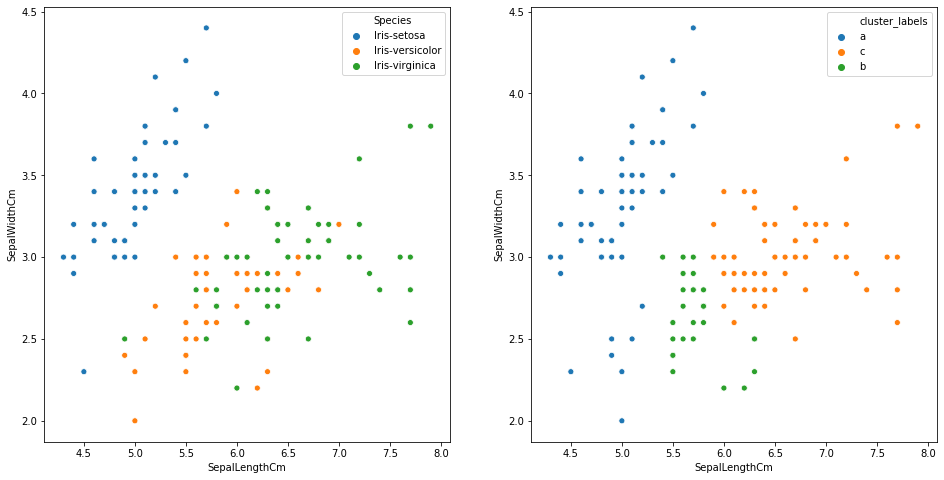

In [80]:
fig,axes=plt.subplots(1,2,figsize=(16,8))
sns.scatterplot(df.iloc[:,1],df.iloc[:,2],hue=df['Species'],ax=axes[0])
sns.scatterplot(df.iloc[:,1],df.iloc[:,2],hue=df['cluster_labels'],ax=axes[1])

## Data preprocessing required in some cases. For example, variables have incomparable units(dimension in cm and price in dollor). Even if the variables with the same units have vastly different scales and variances (price of car and price of toothpast). Law data may lead to bias in clustering. Cluster maybe heavily rely on one variable. Normalization.x/std_dev(x) (from scipy.cluster.vq import whiten)

# Optimal number of clusters

## Dendrograms
To determine the number of clusters in hierarchical clusteing
- x axis represents individual data points
- y axis represents distance (dissimilarity) between clusters
- inverted U at the top represents a single cluster
- width of the U shape represents the distance between the two child clusters ( a wider U shape means that the two child clusters were further away from each other)
- When you move the line below, the number of cluster increases and the inter-cluster distance decreases


In [82]:
from scipy.cluster.hierarchy import dendrogram

In [83]:
z= linkage(sub,method='ward',metric='euclidean')

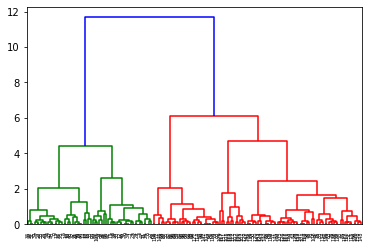

In [85]:
dg=dendrogram(z) # top 2 clusters are furthest from each other

## Elbow
The distortion is the sum of squared distances of points from cluster center. Distortion decreases as the number of cluster increases. It becomes zero when the number of clusters equals the number of data points. Elbow method is a line plot between the number of clusters and their corresponding distortions. 


In [96]:
wcss=[] # inertia or within-cluster sum-of-squares
num_clusters=range(1,10)


In [97]:
#kmeans=KMeans(n_clusters=3,random_state=42)
for i in num_clusters:
    kmean = KMeans(n_clusters=i,random_state=42)
    kmean.fit_predict(X)
    wcss.append(kmean.inertia_)

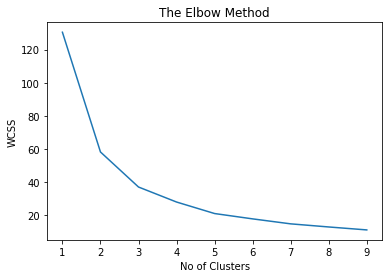

In [98]:
plt.plot(num_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

# Limitations of each clustering algorithm
- K means clustering: Disavantages	
• Difficult	to	predict	the	number	of	clusters	(K-Value)	
• Seeds	have	a	strong	impact	on	the	final	results	
• The	order	of	the	data	has	an	impact	on	the	final	results	
• SensiHve	to	scale:	rescaling	your	datasets	(normalizaHon	or	standardizaHon)	will	
completely	change	results.	

- Hierarchical Clustering:Disavantages	
• Time	complexity:	not	suitable	for	large	datasets	
